In [ ]:
import pandas as pd

bio = pd.read_csv("biometric_verified.csv")
demo = pd.read_csv("demographic_verified.csv")
enrol = pd.read_csv("enrolment_verified.csv")

In [ ]:
print("Biometric:", bio.shape)
print("Demographic:", demo.shape)
print("Enrolment:", enrol.shape)

Biometric: (46077, 6)
Demographic: (48623, 6)
Enrolment: (47031, 7)


In [ ]:
enrol.head()
enrol.tail()
enrol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47031 entries, 0 to 47030
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            47030 non-null  object 
 1   state           47030 non-null  object 
 2   district        47030 non-null  object 
 3   pincode         47030 non-null  float64
 4   age_0_5         47030 non-null  float64
 5   age_5_17        47030 non-null  float64
 6   age_18_greater  47030 non-null  float64
dtypes: float64(4), object(3)
memory usage: 2.5+ MB


In [ ]:
enrol.columns
demo.columns
bio.columns

Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')

In [ ]:
enrol.isna().sum()
demo.isna().sum()
bio.isna().sum()

,0
date,0
state,0
district,0
pincode,0
bio_age_5_17,0
bio_age_17_,0


In [ ]:
enrol['date'].dtype

dtype('O')

In [ ]:
enrol['date'] = pd.to_datetime(enrol['date'], errors='coerce')

In [ ]:
enrol['date'].isna().sum()

np.int64(1)

In [ ]:
enrol.duplicated().sum()
demo.duplicated().sum()
bio.duplicated().sum()

np.int64(0)

In [ ]:
enrol['state'].value_counts().head(20)

,count
state,
Uttar Pradesh,5406
Tamil Nadu,4546
Karnataka,3375
West Bengal,3361
Maharashtra,3261
Bihar,2824
Andhra Pradesh,2762
Rajasthan,2651
Madhya Pradesh,2563


In [ ]:
enrol['state'] = enrol['state'].str.title().str.strip()

In [ ]:
enrol.describe()

,date,pincode,age_0_5,age_5_17,age_18_greater
count,47030,47030.000000,47030.000000,47030.000000,47030.000000
mean,2025-11-05 08:23:07.641930496,523179.903742,2.319923,1.223942,0.088518
min,2025-10-26 00:00:00,110001.000000,0.000000,0.000000,0.000000
25%,2025-10-27 00:00:00,361140.000000,1.000000,0.000000,0.000000
50%,2025-10-28 00:00:00,522505.500000,1.000000,0.000000,0.000000
75%,2025-10-29 00:00:00,700103.000000,2.000000,1.000000,0.000000
max,2025-12-31 00:00:00,855117.000000,115.000000,89.000000,72.000000
std,NaN,206984.505613,3.827981,3.079639,0.797683


In [ ]:
set(enrol['state']).intersection(set(demo['state']))

{'Andaman & Nicobar Islands',
 'Andaman And Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra & Nagar Haveli',
 'Dadra And Nagar Haveli',
 'Dadra And Nagar Haveli And Daman And Diu',
 'Daman And Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Jammu And Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Orissa',
 'Pondicherry',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bangal',
 'West Bengal'}

In [ ]:
enrol['date'].min(), enrol['date'].max()
demo['date'].min(), demo['date'].max()
bio['date'].min(), bio['date'].max()

('2025-01-03', '2025-01-05')

**For demographic dataset**

In [ ]:
demo = pd.read_csv("demographic_verified.csv")
demo.shape

(48623, 6)

In [ ]:
demo.head()
demo.tail()
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48623 entries, 0 to 48622
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           48623 non-null  object 
 1   state          48623 non-null  object 
 2   district       48623 non-null  object 
 3   pincode        48623 non-null  int64  
 4   demo_age_5_17  48623 non-null  float64
 5   demo_age_17_   48623 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.2+ MB


In [ ]:
demo = demo.loc[:, ~demo.columns.str.contains("^Unnamed")]

In [ ]:
demo.isna().sum()

,0
date,0
state,0
district,0
pincode,0
demo_age_5_17,0
demo_age_17_,0


In [ ]:
demo = demo.dropna()

In [ ]:
demo.isna().sum()

,0
date,0
state,0
district,0
pincode,0
demo_age_5_17,0
demo_age_17_,0


In [ ]:
demo['date'].dtype

dtype('O')

In [ ]:
demo['date'] = pd.to_datetime(demo['date'], errors='coerce')
demo['date'].isna().sum()

np.int64(0)

In [ ]:
demo.duplicated().sum()
demo = demo.drop_duplicates() #if > 0


In [ ]:
demo['state'].value_counts().head(20)
demo['state'] = demo['state'].str.title().str.strip()

In [ ]:
demo['date'].min(), demo['date'].max()

(Timestamp('2025-11-18 00:00:00'), Timestamp('2025-12-13 00:00:00'))

In [ ]:
demo.describe()

,date,pincode,demo_age_5_17,demo_age_17_
count,48623,48623.000000,48623.000000,48623.000000
mean,2025-12-04 03:20:54.739526656,533460.751949,1.409148,13.277790
min,2025-11-18 00:00:00,110001.000000,0.000000,0.000000
25%,2025-12-03 00:00:00,400087.500000,0.000000,2.000000
50%,2025-12-05 00:00:00,533440.000000,1.000000,6.000000
75%,2025-12-08 00:00:00,700082.000000,2.000000,15.000000
max,2025-12-13 00:00:00,855456.000000,44.000000,803.000000
std,NaN,196143.749120,2.419773,23.103767


**For Biometric Dataset**

In [ ]:
bio = pd.read_csv("biometric_verified.csv")
bio.shape

(46077, 6)

In [ ]:
bio.head()
bio.tail()
bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46077 entries, 0 to 46076
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          46077 non-null  object 
 1   state         46077 non-null  object 
 2   district      46077 non-null  object 
 3   pincode       46077 non-null  float64
 4   bio_age_5_17  46077 non-null  float64
 5   bio_age_17_   46077 non-null  float64
dtypes: float64(3), object(3)
memory usage: 2.1+ MB


In [ ]:
bio.columns
bio = bio.loc[:, ~bio.columns.str.contains("^Unnamed")]

In [ ]:
bio.isna().sum()

,0
date,0
state,0
district,0
pincode,0
bio_age_5_17,0
bio_age_17_,0


In [ ]:
bio = bio.dropna()

In [ ]:
bio.isna().sum()

,0
date,0
state,0
district,0
pincode,0
bio_age_5_17,0
bio_age_17_,0


In [ ]:
bio['date'].dtype
bio['date'] = pd.to_datetime(bio['date'], errors='coerce')
bio['date'].isna().sum()


np.int64(0)

In [ ]:
bio.duplicated().sum()

np.int64(0)

In [ ]:
bio['state'].value_counts().head(20)

,count
state,
Tamil Nadu,4756
Andhra Pradesh,3913
Uttar Pradesh,3858
Karnataka,3612
Maharashtra,3488
West Bengal,2964
Kerala,2730
Gujarat,2354
Odisha,2183


In [ ]:
bio['state'] = bio['state'].str.title().str.strip()

In [ ]:
bio.describe()

,date,pincode,bio_age_5_17,bio_age_17_
count,46077,46077.000000,46077.000000,46077.000000
mean,2025-01-03 13:52:42.627775488,521825.723723,184.847299,202.238774
min,2025-01-03 00:00:00,110001.000000,10.000000,0.000000
25%,2025-01-03 00:00:00,388305.000000,37.000000,49.000000
50%,2025-01-04 00:00:00,524132.000000,88.000000,105.000000
75%,2025-01-04 00:00:00,686564.000000,207.000000,233.000000
max,2025-01-05 00:00:00,855117.000000,8002.000000,7625.000000
std,NaN,199773.117289,302.857242,301.045507


In [ ]:
bio['date'].min(), bio['date'].max()

(Timestamp('2025-01-03 00:00:00'), Timestamp('2025-01-05 00:00:00'))

In [ ]:
print("Enrolment:", enrol.shape, enrol['date'].min(), enrol['date'].max())
print("Demographic:", demo.shape, demo['date'].min(), demo['date'].max())
print("Biometric:", bio.shape, bio['date'].min(), bio['date'].max())

Enrolment: (47031, 7) 2025-10-26 00:00:00 2025-12-31 00:00:00
Demographic: (48623, 6) 2025-11-18 00:00:00 2025-12-13 00:00:00
Biometric: (46077, 6) 2025-01-03 00:00:00 2025-01-05 00:00:00


In [ ]:
enrol.to_csv("enrolment_verified.csv", index=False)
demo.to_csv("demographic_verified.csv", index=False)
bio.to_csv("biometric_verified.csv", index=False)

# **EDA**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

enrol = pd.read_csv("enrolment_verified.csv")
demo  = pd.read_csv("demographic_verified.csv")
bio   = pd.read_csv("biometric_verified.csv")

enrol['date'] = pd.to_datetime(enrol['date'])
demo['date']  = pd.to_datetime(demo['date'])
bio['date']   = pd.to_datetime(bio['date'])

In [ ]:
enrol.shape, demo.shape, bio.shape

((47031, 7), (48623, 6), (46077, 6))

## **Total enrolment by state (Chart 1)**

Shows enrolment concentration and regional disparity.

What to observe:
Are enrolments concentrated in a few states?
Do top states dominate heavily?
Any unexpected leaders?

This answers: How is Aadhaar enrolment distributed across regions?

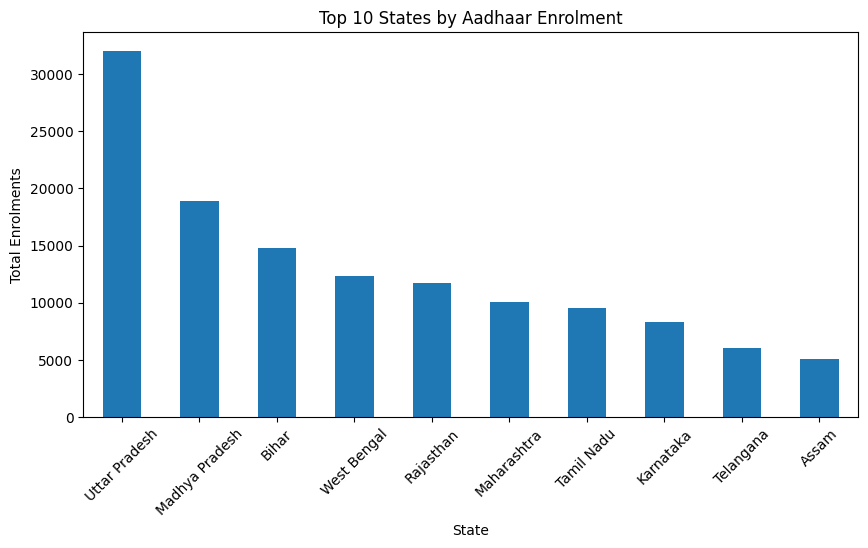

In [ ]:
enrol['total_enrolments'] = enrol['age_0_5'] + enrol['age_5_17'] + enrol['age_18_greater']

state_enrol = (
    enrol.groupby('state')['total_enrolments']
    .sum()
    .sort_values(ascending=False)
)

state_enrol.head(10).plot(
    kind='bar', figsize=(10,5)
)
plt.title("Top 10 States by Aadhaar Enrolment")
plt.ylabel("Total Enrolments")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.show()

What to observe:
Mean vs max difference

Large standard deviation = skewed distribution

Insight:
**Enrolment distribution is highly skewed, with a small number of states contributing a disproportionate share.**

In [ ]:
state_enrol.describe()

,total_enrolments
count,44.000000
mean,3882.522727
std,6296.447782
min,1.000000
25%,54.250000
50%,1073.500000
75%,4755.750000
max,32043.000000


# **Short-term enrolment trend (Chart 2)**

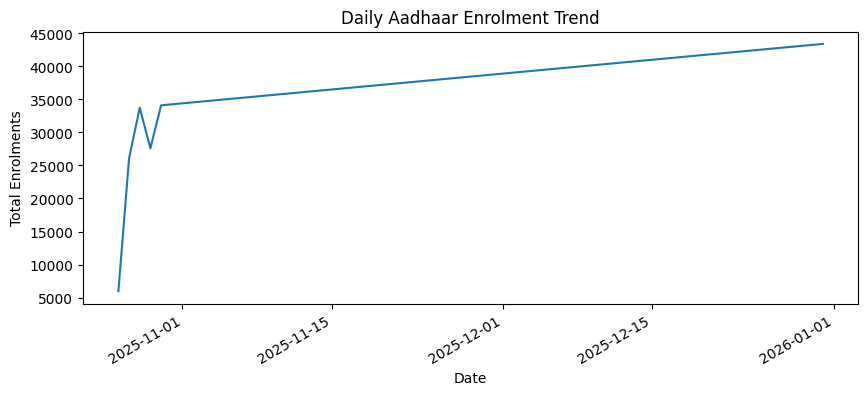

In [ ]:
daily_enrol = (
    enrol.groupby('date')['total_enrolments']
    .sum()
)

daily_enrol.plot(figsize=(10,4))
plt.title("Daily Aadhaar Enrolment Trend")
plt.ylabel("Total Enrolments")
plt.xlabel("Date")
plt.show()

# **Demographic updates by state (Chart 3)**

What to observe:
Do the same states appear as enrolment?
Any state with high updates but moderate enrolment?

This answers:
Where is demographic update demand highest?

In [ ]:
demo.columns


Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')

In [ ]:
demo['update_count'] = demo.filter(like='demo_').sum(axis=1)


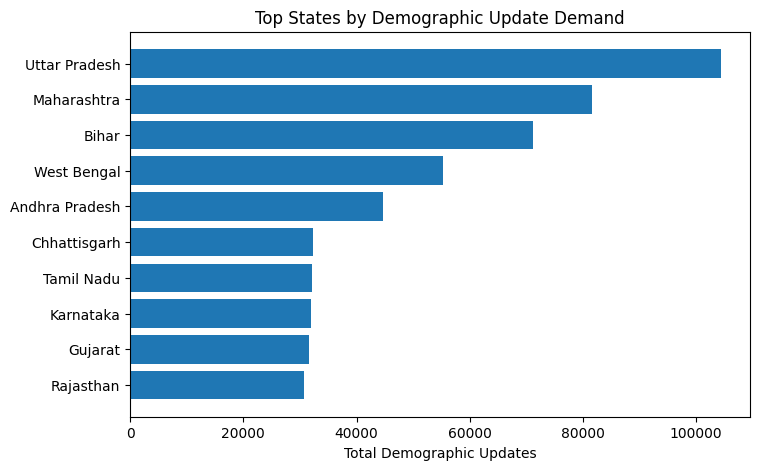

In [ ]:
state_demo = (
    demo.groupby('state')['update_count']
    .sum()
    .sort_values(ascending=False)
)

top_demo = state_demo.head(10)

plt.figure(figsize=(8,5))
plt.barh(top_demo.index, top_demo.values)
plt.xlabel("Total Demographic Updates")
plt.title("Top States by Demographic Update Demand")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
state_demo.describe()


,update_count
count,48.0000
mean,14877.5625
std,23365.7254
min,1.0000
25%,127.2500
50%,1419.5000
75%,22100.5000
max,104323.0000


# **Biometric updates by state (Chart 4)**

important wording for report:
Biometric update data represents a short operational snapshot and is analyzed for regional variation rather than long-term trends.

What to observe:
Extreme outliers and States with unusually high activity in a short window

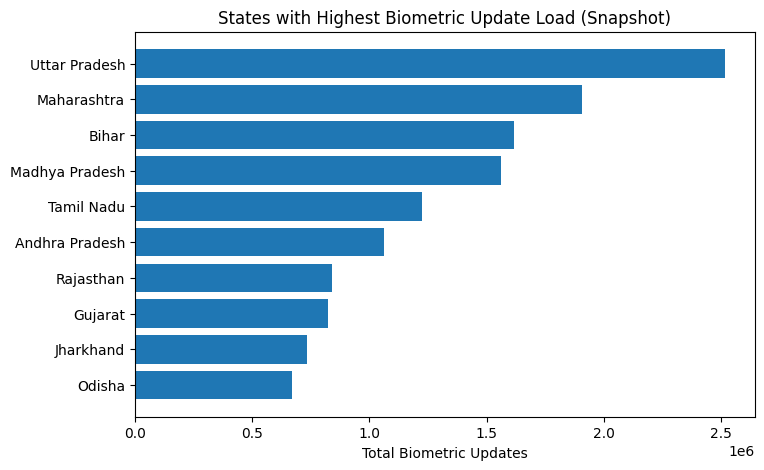

In [ ]:
bio['update_count'] = bio.filter(like='bio_age_').sum(axis=1)

state_bio = (
    bio.groupby('state')['update_count']
    .sum()
    .sort_values(ascending=False)
)

top_bio = state_bio.head(10)

plt.figure(figsize=(8,5))
plt.barh(top_bio.index, top_bio.values)
plt.xlabel("Total Biometric Updates")
plt.title("States with Highest Biometric Update Load (Snapshot)")
plt.gca().invert_yaxis()
plt.show()

**Biometric type distribution**

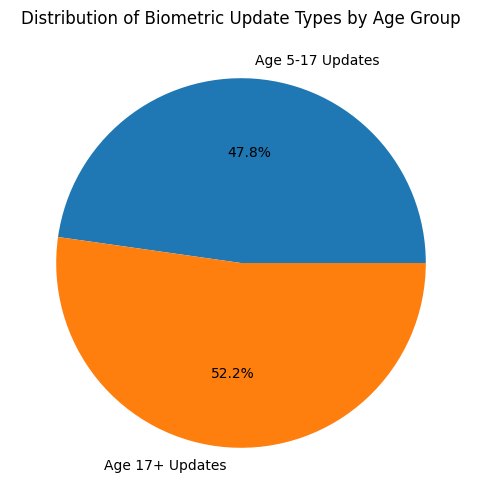

In [ ]:
biometric_update_sums = pd.Series({
    'Age 5-17 Updates': bio['bio_age_5_17'].sum(),
    'Age 17+ Updates': bio['bio_age_17_'].sum()
})

biometric_update_sums.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Distribution of Biometric Update Types by Age Group")
plt.ylabel("")
plt.show()

# **CROSS-DATASET INSIGHTS**

**Create state-level comparison table**

In [ ]:
summary = pd.DataFrame({
    'enrolments': enrol.groupby('state')['total_enrolments'].sum(),
    'demographic_updates': demo.groupby('state')['update_count'].sum(),
    'biometric_updates': bio.groupby('state')['update_count'].sum()
}).fillna(0)

summary.head()

,enrolments,demographic_updates,biometric_updates
state,,,
Andaman & Nicobar Islands,6.0,32.0,393.0
Andaman And Nicobar Islands,6.0,177.0,5079.0
Andhra Pradesh,4603.0,44601.0,1061973.0
Arunachal Pradesh,141.0,610.0,16219.0
Assam,5107.0,19953.0,241448.0


**Update intensity metric (Chart 5)**

This answers:

Which states have disproportionate update load?

Where might data quality or Aadhaar usage stress exist?

In [ ]:
summary = pd.DataFrame({
    'enrolments': enrol.groupby('state')['total_enrolments'].sum(),
    'demographic_updates': demo.groupby('state')['update_count'].sum(),
    'biometric_updates': bio.groupby('state')['update_count'].sum()
}).fillna(0).reset_index()


In [ ]:
summary['state'] = (
    summary['state']
    .str.title()
    .str.strip()
    .replace({
        'Westbengal': 'West Bengal',
        'West Bengli': 'West Bengal',
        'West Bengal ': 'West Bengal',
        'Dadra And Nagar Haveli And Daman And Diu': 'DNH & DD',
        'Daman & Diu': 'DNH & DD',
        'Dadra And Nagar Haveli': 'DNH & DD'
    })
)


In [ ]:
summary = summary[summary['enrolments'] > 100].copy()
summary['total_updates'] = (
    summary['demographic_updates'] + summary['biometric_updates']
)

summary['updates_per_enrolment'] = (
    summary['total_updates'] / summary['enrolments']
)


In [ ]:
summary.describe()
summary.sort_values('updates_per_enrolment', ascending=False).head(10)
summary.sort_values('updates_per_enrolment').head(10)


,state,enrolments,demographic_updates,biometric_updates,total_updates,updates_per_enrolment
28,Meghalaya,1208.0,1254.0,25074.0,26328.0,21.794702
45,West Bengal,12382.0,55285.0,554879.0,610164.0,49.278307
4,Assam,5107.0,19953.0,241448.0,261401.0,51.184844
39,Telangana,6079.0,15183.0,329868.0,345051.0,56.761145
27,Manipur,639.0,4613.0,34494.0,39107.0,61.200313
36,Rajasthan,11770.0,30680.0,839990.0,870670.0,73.973662
41,Uttar Pradesh,32043.0,104323.0,2518228.0,2622551.0,81.844740
21,Karnataka,8331.0,31930.0,655192.0,687122.0,82.477734
25,Madhya Pradesh,18939.0,28977.0,1560519.0,1589496.0,83.927134
22,Kerala,4737.0,20700.0,383596.0,404296.0,85.348533


In [ ]:
final_summary = summary[[
    'state',
    'enrolments',
    'demographic_updates',
    'biometric_updates',
    'total_updates',
    'updates_per_enrolment'
]].sort_values('updates_per_enrolment', ascending=False)
final_summary.to_csv("final_state_summary.csv", index=False)


**Visualize mismatch (Chart 6)**

In [ ]:
# summary['updates_per_enrolment'].sort_values(
#     ascending=False
# ).head(10).plot(kind='bar', figsize=(10,5))

# plt.title("States with Highest Update Intensity")
# plt.ylabel("Updates per Enrolment")
# plt.xlabel("State")
# plt.xticks(rotation=45)
# plt.show()
summary = summary.reset_index()

summary['state'] = (
    summary['state']
    .str.title()
    .str.strip()
    .replace({
        'Dadra And Nagar Haveli And Daman And Diu': 'DNH & DD',
        'Andaman And Nicobar Islands': 'Andaman & Nicobar',
        'Dadra And Nagar Haveli': 'DNH',
        'Daman And Diu': 'DD'
    })
)


In [ ]:
filtered = summary[summary['enrolments'] > 100]


In [ ]:
top_intensity = (
    filtered
    .sort_values('updates_per_enrolment', ascending=False)
    .head(8)
)


In [ ]:
# plt.figure(figsize=(8,5))
# plt.barh(
#     top_intensity['state'],
#     top_intensity['updates_per_enrolment']
# )
# plt.xlabel("Updates per Enrolment")
# plt.title("States with Highest Update Intensity")
# plt.gca().invert_yaxis()
# plt.show()
summary = summary.reset_index(drop=True)

summary['state'] = (
    summary['state']
    .str.title()
    .str.strip()
    .replace({
        'Westbengal': 'West Bengal',
        'West Bengli': 'West Bengal',
        'West Bengal ': 'West Bengal',
        'Dadra And Nagar Haveli And Daman And Diu': 'DNH & DD',
        'Daman & Diu': 'DNH & DD',
        'Dadra And Nagar Haveli': 'DNH & DD'
    })
)


In [ ]:
summary = summary[summary['enrolments'] > 100].copy()
summary['total_updates'] = (
    summary['demographic_updates'] + summary['biometric_updates']
)

summary['updates_per_enrolment'] = (
    summary['total_updates'] / summary['enrolments']
)
summary[['enrolments', 'total_updates', 'updates_per_enrolment']].describe()

,enrolments,total_updates,updates_per_enrolment
count,30.000000,3.000000e+01,30.000000
mean,5682.733333,6.162594e+05,141.088800
std,6946.030268,6.539082e+05,97.286437
min,112.000000,1.625400e+04,21.794702
25%,1006.250000,1.146072e+05,82.840084
50%,3960.000000,4.630675e+05,114.010835
75%,7768.000000,8.309795e+05,157.866469
max,32043.000000,2.622551e+06,466.709091


In [ ]:
top_intensity = (
    summary
    .sort_values('updates_per_enrolment', ascending=False)
    .head(8)
)

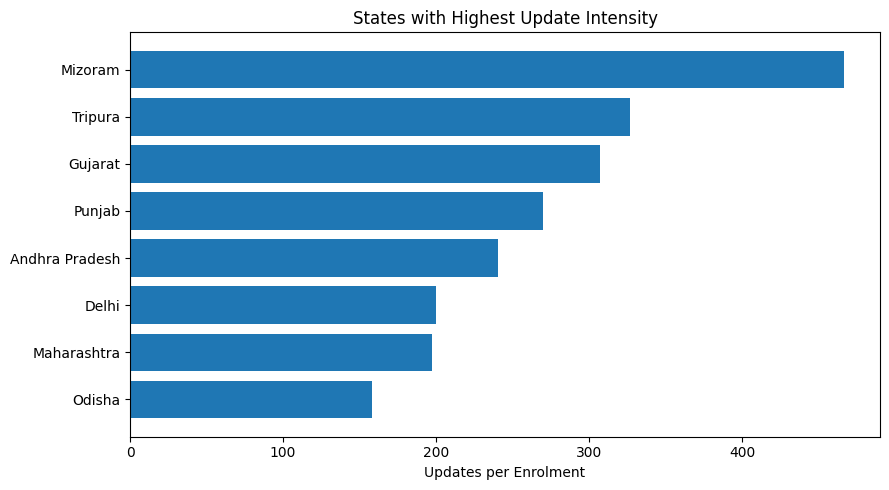

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
plt.barh(
    top_intensity['state'],
    top_intensity['updates_per_enrolment']
)

plt.xlabel("Updates per Enrolment")
plt.title("States with Highest Update Intensity")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


**Chart 7: Enrolment Share (Top states vs Rest of India)**

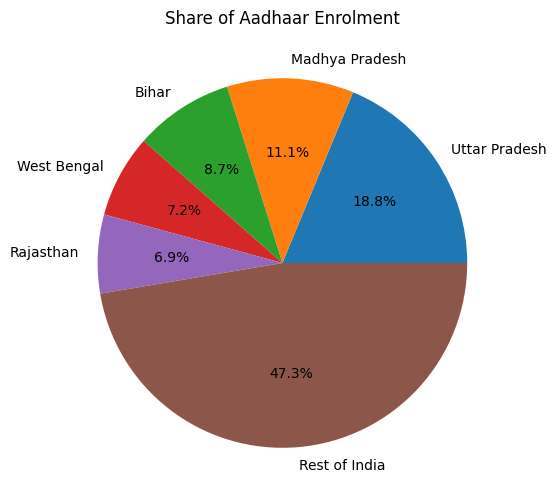

In [ ]:
top5 = state_enrol.head(5)
others = state_enrol.iloc[5:].sum()

share_df = pd.Series(
    list(top5.values) + [others],
    index=list(top5.index) + ['Rest of India']
)

share_df.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6)
)
plt.title("Share of Aadhaar Enrolment")
plt.ylabel("")
plt.show()


**Scatter — Enrolment vs Total Updates**

Why this chart: mismatch questions, anomaly questions and stress detection

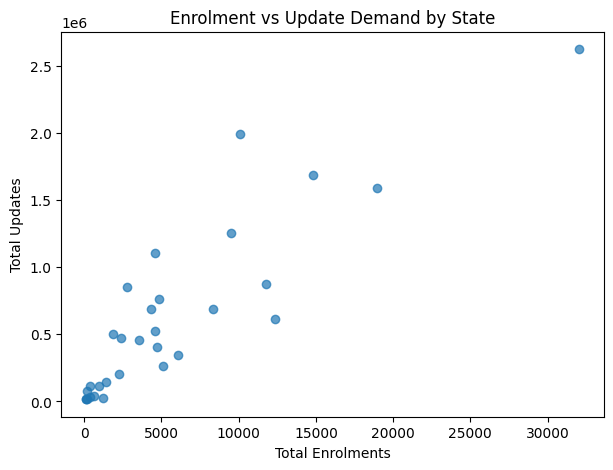

In [ ]:
summary['total_updates'] = (
    summary['demographic_updates'] + summary['biometric_updates']
)

plt.figure(figsize=(7,5))
plt.scatter(
    summary['enrolments'],
    summary['total_updates'],
    alpha=0.7
)
plt.xlabel("Total Enrolments")
plt.ylabel("Total Updates")
plt.title("Enrolment vs Update Demand by State")
plt.show()


**Distribution of Update Intensity**

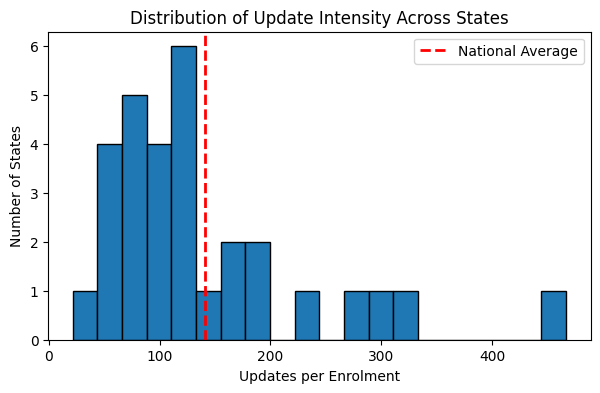

In [ ]:
plt.figure(figsize=(7,4))
plt.hist(
    filtered['updates_per_enrolment'],
    bins=20,
    edgecolor='black'
)

plt.axvline(
    filtered['updates_per_enrolment'].mean(),
    color='red',
    linestyle='dashed',
    linewidth=2,
    label='National Average'
)

plt.xlabel("Updates per Enrolment")
plt.ylabel("Number of States")
plt.title("Distribution of Update Intensity Across States")
plt.legend()
plt.show()


**Chart 10: Top High-Risk States Table**

In [ ]:
filtered['total_updates'] = (filtered['demographic_updates'] + filtered['biometric_updates'])

risk_table = filtered[
    filtered['updates_per_enrolment'] > filtered['updates_per_enrolment'].mean()
].sort_values(
    'updates_per_enrolment', ascending=False
)

risk_table[['state', 'enrolments', 'total_updates', 'updates_per_enrolment']].head(10)

,state,enrolments,total_updates,updates_per_enrolment
18,Mizoram,165.0,77007.0,466.709091
26,Tripura,351.0,114569.0,326.407407
7,Gujarat,2781.0,854840.0,307.385832
22,Punjab,1867.0,503567.0,269.719871
0,Andhra Pradesh,4603.0,1106574.0,240.402781
6,Delhi,2368.0,472596.0,199.576014
15,Maharashtra,10070.0,1987561.0,197.374479
20,Odisha,4351.0,686954.0,157.884165
11,Jharkhand,4812.0,759398.0,157.813383
4,Chandigarh,112.0,16635.0,148.526786


**Demographic vs Biometric Update Mix**

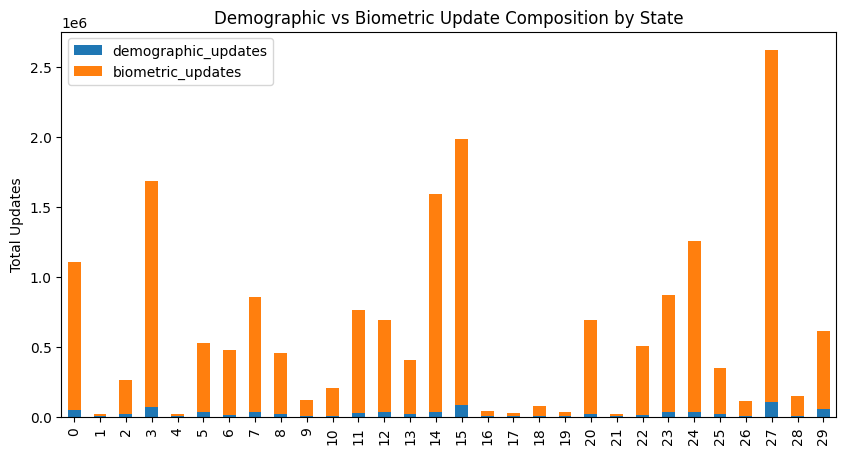

In [ ]:
summary[['demographic_updates', 'biometric_updates']].plot(
    kind='bar',
    stacked=True,
    figsize=(10,5)
)
plt.title("Demographic vs Biometric Update Composition by State")
plt.ylabel("Total Updates")
plt.show()


In [ ]:
summary[['enrolments', 'demographic_updates', 'biometric_updates', 'updates_per_enrolment']].describe()


,enrolments,demographic_updates,biometric_updates,updates_per_enrolment
count,30.000000,30.000000,3.000000e+01,30.000000
mean,5682.733333,23717.966667,5.925415e+05,141.088800
std,6946.030268,25868.940908,6.300927e+05,97.286437
min,112.000000,406.000000,1.544300e+04,21.794702
25%,1006.250000,3228.500000,1.122122e+05,82.840084
50%,3960.000000,17004.000000,4.488945e+05,114.010835
75%,7768.000000,31833.750000,8.007452e+05,157.866469
max,32043.000000,104323.000000,2.518228e+06,466.709091


In [ ]:
summary.sort_values('updates_per_enrolment', ascending=False).head(10)
summary.sort_values('updates_per_enrolment').head(10)

,index,state,enrolments,demographic_updates,biometric_updates,total_updates,updates_per_enrolment
17,28,Meghalaya,1208.0,1254.0,25074.0,26328.0,21.794702
29,45,West Bengal,12382.0,55285.0,554879.0,610164.0,49.278307
2,4,Assam,5107.0,19953.0,241448.0,261401.0,51.184844
25,39,Telangana,6079.0,15183.0,329868.0,345051.0,56.761145
16,27,Manipur,639.0,4613.0,34494.0,39107.0,61.200313
23,36,Rajasthan,11770.0,30680.0,839990.0,870670.0,73.973662
27,41,Uttar Pradesh,32043.0,104323.0,2518228.0,2622551.0,81.844740
12,21,Karnataka,8331.0,31930.0,655192.0,687122.0,82.477734
14,25,Madhya Pradesh,18939.0,28977.0,1560519.0,1589496.0,83.927134
13,22,Kerala,4737.0,20700.0,383596.0,404296.0,85.348533


In [ ]:
def clean_state(df):
    df['state'] = (
        df['state']
        .str.title()
        .str.strip()
        .replace({
            'Westbengal': 'West Bengal',
            'West Bengli': 'West Bengal',
            'West Bengal ': 'West Bengal',
            'Dadra And Nagar Haveli And Daman And Diu': 'DNH & DD',
            'Daman & Diu': 'DNH & DD',
            'Dadra And Nagar Haveli': 'DNH & DD'
        })
    )
    return df

enrol = clean_state(enrol)
demo  = clean_state(demo)
bio   = clean_state(bio)


In [ ]:
summary = pd.DataFrame({
    'enrolments': enrol.groupby('state')['total_enrolments'].sum(),
    'demographic_updates': demo.groupby('state')['update_count'].sum(),
    'biometric_updates': bio.groupby('state')['update_count'].sum()
}).fillna(0).reset_index()
summary = summary[summary['enrolments'] >= 100].copy()


In [ ]:
summary['total_updates'] = (
    summary['demographic_updates'] + summary['biometric_updates']
)

summary['updates_per_enrolment'] = (
    summary['total_updates'] / summary['enrolments']
)
summary[['enrolments','updates_per_enrolment']].describe()
summary.sort_values('updates_per_enrolment', ascending=False).head(10)
summary.sort_values('updates_per_enrolment').head(10)



,state,enrolments,demographic_updates,biometric_updates,total_updates,updates_per_enrolment
26,Meghalaya,1208.0,1254.0,25074.0,26328.0,21.794702
43,West Bengal,12382.0,55287.0,554879.0,610166.0,49.278469
4,Assam,5107.0,19953.0,241448.0,261401.0,51.184844
37,Telangana,6079.0,15183.0,329868.0,345051.0,56.761145
25,Manipur,639.0,4613.0,34494.0,39107.0,61.200313
34,Rajasthan,11770.0,30680.0,839990.0,870670.0,73.973662
39,Uttar Pradesh,32043.0,104323.0,2518228.0,2622551.0,81.844740
19,Karnataka,8331.0,31930.0,655192.0,687122.0,82.477734
23,Madhya Pradesh,18939.0,28977.0,1560519.0,1589496.0,83.927134
20,Kerala,4737.0,20700.0,383596.0,404296.0,85.348533


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BASE_PATH = "/content/drive/MyDrive/UIDAI_Hackathon"
CHART_PATH = f"{BASE_PATH}/charts"

import os
os.makedirs(CHART_PATH, exist_ok=True)


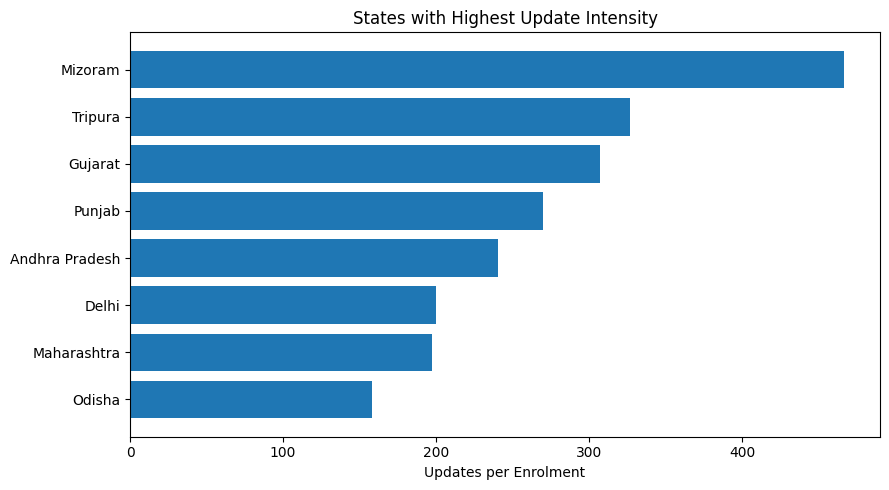

In [ ]:
plt.figure(figsize=(9,5))

# your plotting code here
plt.barh(top_intensity['state'], top_intensity['updates_per_enrolment'])
plt.xlabel("Updates per Enrolment")
plt.title("States with Highest Update Intensity")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig(f"{CHART_PATH}/update_intensity_states.png", dpi=300)
plt.show()


In [ ]:
final_summary.to_csv(
    f"{BASE_PATH}/final_state_summary.csv",
    index=False
)


In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import os

# Mount Drive (safe even if already mounted)
drive.mount('/content/drive')

BASE_PATH = "/content/drive/MyDrive/UIDAI_Hackathon"
CHART_PATH = f"{BASE_PATH}/charts"
os.makedirs(CHART_PATH, exist_ok=True)

# Save all open matplotlib figures
for i, fig_num in enumerate(plt.get_fignums(), start=1):
    fig = plt.figure(fig_num)
    fig.savefig(
        f"{CHART_PATH}/chart_{i:02d}.png",
        dpi=300,
        bbox_inches="tight"
    )

print(f"Saved {len(plt.get_fignums())} charts to {CHART_PATH}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saved 0 charts to /content/drive/MyDrive/UIDAI_Hackathon/charts


In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import os

drive.mount('/content/drive')

BASE_PATH = "/content/drive/MyDrive/UIDAI_Hackathon"
CHART_PATH = f"{BASE_PATH}/charts"
os.makedirs(CHART_PATH, exist_ok=True)

fig_nums = plt.get_fignums()

print("Active figures:", fig_nums)

for i, fig_num in enumerate(fig_nums, start=1):
    fig = plt.figure(fig_num)
    fig.savefig(
        f"{CHART_PATH}/chart_{i:02d}.png",
        dpi=300,
        bbox_inches="tight"
    )

print(f"Saved {len(fig_nums)} charts to {CHART_PATH}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Active figures: []
Saved 0 charts to /content/drive/MyDrive/UIDAI_Hackathon/charts


In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import os

drive.mount("/content/drive")

CHART_PATH = "/content/drive/MyDrive/UIDAI_Hackathon/charts"
os.makedirs(CHART_PATH, exist_ok=True)

def save_and_show(filename):
    plt.savefig(
        f"{CHART_PATH}/{filename}.png",
        dpi=300,
        bbox_inches="tight"
    )
    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
